In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
delhi=pd.read_csv("Data/testset.csv")

In [23]:
delhi

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.00,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.00,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.20,0.0,North,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99565,20161231-12:00,Partly Cloudy,15.0,0,0,NaN,77.0,NaN,1015.0,0,0,18.0,0,0,0.50,110.0,ESE,NaN,NaN,7.4
99566,20161231-13:00,Partly Cloudy,16.0,0,0,NaN,100.0,NaN,1014.0,0,0,16.0,0,0,0.80,90.0,East,NaN,NaN,3.7
99567,20161231-15:00,NaN,13.0,0,0,NaN,NaN,NaN,1016.0,0,0,NaN,0,0,0.05,10.0,North,NaN,NaN,59.3
99568,20161231-18:00,Patches of Fog,12.0,1,0,NaN,100.0,NaN,1016.0,0,0,12.0,0,0,0.50,NaN,NaN,NaN,NaN,0.0


In [24]:
delhi.drop(["_precipm",'_pressurem','_heatindexm','_hum','_thunder','_tornado','_vism','_wdird','_wdire','_wgustm','_windchillm','_wspdm'],axis=1,inplace=True)
delhi.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_rain,_snow,_tempm
0,19961101-11:00,Smoke,9.0,0,0,0,0,30.0
1,19961101-12:00,Smoke,10.0,0,0,0,0,28.0
2,19961101-13:00,Smoke,11.0,0,0,0,0,24.0
3,19961101-14:00,Smoke,10.0,0,0,0,0,24.0
4,19961101-16:00,Smoke,11.0,0,0,0,0,23.0


In [25]:
delhi['datetime_utc']=pd.to_datetime(delhi['datetime_utc'])
delhi['datetime_utc'].head()

0   1996-11-01 11:00:00
1   1996-11-01 12:00:00
2   1996-11-01 13:00:00
3   1996-11-01 14:00:00
4   1996-11-01 16:00:00
Name: datetime_utc, dtype: datetime64[ns]

In [26]:
delhi.describe()

,_dewptm,_fog,_hail,_rain,_snow,_tempm
count,98950.000000,99570.000000,99570.000000,99570.000000,99570.000000,98898.000000
mean,15.788388,0.068746,0.000131,0.026323,0.000010,25.526553
std,7.085844,0.253022,0.011426,0.160095,0.003169,8.471719
min,-24.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,15.000000,0.000000,0.000000,0.000000,0.000000,27.000000
75%,22.000000,0.000000,0.000000,0.000000,0.000000,32.000000
max,75.000000,1.000000,1.000000,1.000000,1.000000,90.000000


In [28]:
delhiplot=delhi[['datetime_utc','_tempm']].copy()
delhiplot['just_date'] = delhiplot['datetime_utc'].dt.date

delhifinal=delhiplot.drop('datetime_utc',axis=1)



delhifinal.set_index('just_date', inplace= True)

delhifinal.head()

,_tempm
just_date,
1996-11-01,30.0
1996-11-01,28.0
1996-11-01,24.0
1996-11-01,24.0
1996-11-01,23.0


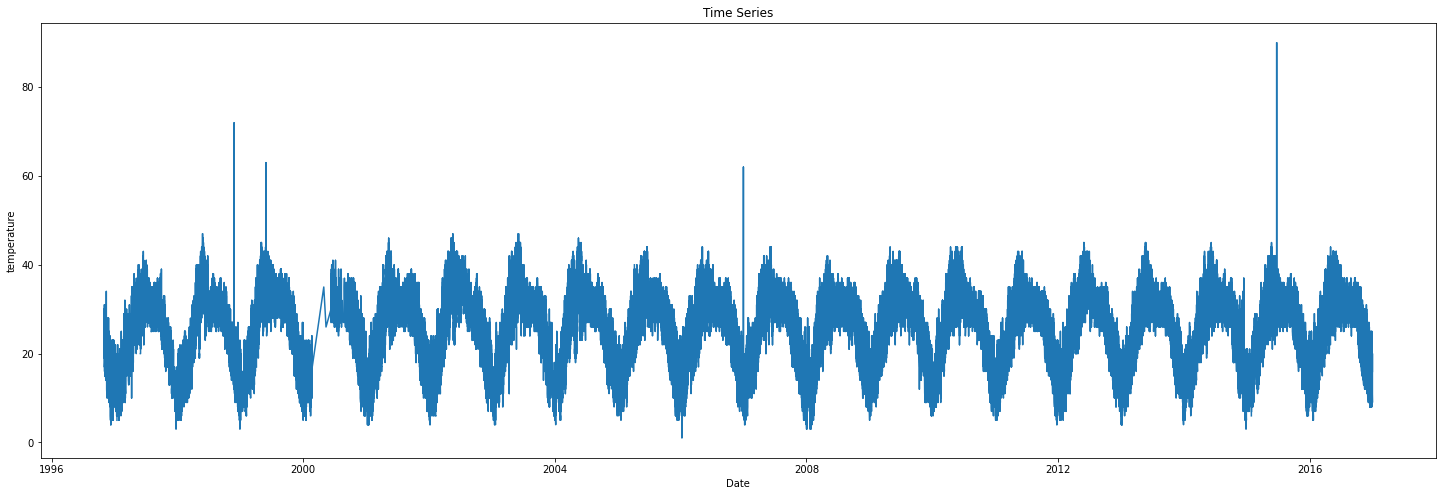

In [29]:
plt.figure(figsize=(25,8))
plt.plot(delhifinal)
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('temperature')
plt.show()


In [31]:
delhi['_conds'].value_counts(ascending=False)

Haze                             47003
Smoke                            20551
Mist                              9104
Clear                             3129
Widespread Dust                   2830
Fog                               2656
Scattered Clouds                  2197
Partly Cloudy                     2070
Shallow Fog                       1860
Mostly Cloudy                     1520
Light Rain                        1297
Partial Fog                       1004
Patches of Fog                     850
Thunderstorms and Rain             471
Heavy Fog                          418
Light Drizzle                      410
Rain                               394
Unknown                            382
Blowing Sand                       358
Overcast                           313
Thunderstorm                       190
Light Thunderstorms and Rain       170
Drizzle                            111
Light Thunderstorm                  63
Light Fog                           56
Heavy Rain               

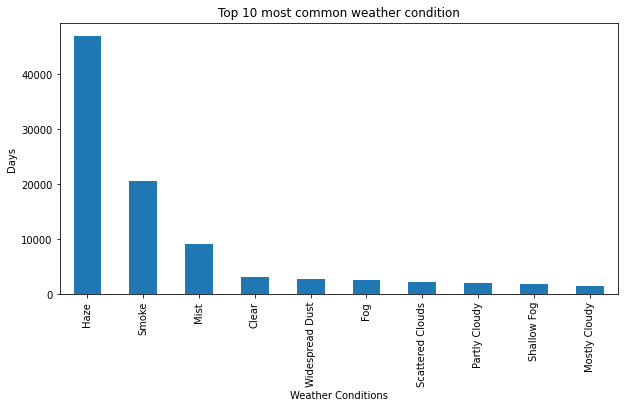

In [37]:
plt.figure(figsize=(10, 5));
delhi['_conds'].value_counts().head(10).plot(kind='bar');
plt.title("Top 10 most common weather condition")
plt.ylabel('Days')
plt.xlabel('Weather Conditions')
plt.plot();
plt.savefig("save.png")

In [ ]:
haze=delhi[' _conds'][delhi[' _conds'] == 'Haze'].count()
print(haze)
smoke=delhi[' _conds'][delhi[' _conds'] == 'Smoke'].count()
print(smoke)

In [ ]:
rain=delhi[' _conds'][delhi[' _conds'] == 'Rain'].count()
print(rain)

In [ ]:
clear=delhi[' _conds'][delhi[' _conds'] == 'Clear'].count()
print(clear)


In [ ]:
fog=delhi[' _conds'][delhi[' _conds'] == 'Fog'].count()
print(fog)

In [ ]:
Mist=delhi[' _conds'][delhi[' _conds'] == 'Mist'].count()
print(Mist)

In [ ]:
Dust=delhi[' _conds'][delhi[' _conds'] == 'Widespread Dust'].count()
print(Dust)

In [ ]:
Heavy=delhi[' _conds'][delhi[' _conds'] == 'Heavy Fog'].count()
print(Heavy)

In [ ]:
data = {'haze': haze,'smoke': smoke,'rain':rain,'clear':clear,'fog':fog,'Mist':Mist,'Dust':Dust,'Heavy':Heavy}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(23, 5), sharey=True)
axs[0].bar(names, values,color='Orange')
axs[1].scatter(names, values)
axs[2].plot(names, values, color='Red')
fig.suptitle('Categorical Plotting')

In [ ]:
delhi_new=pd.read_csv("archive/DailyDelhiClimateTest.csv")

In [ ]:
delhi_new

In [ ]:
delhi_new.isnull().sum()